In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn import preprocessing
from adjustText import adjust_text
import os
from scipy.stats import pearsonr


expr = pd.read_csv("../processed_data/normalized_expression.csv", index_col = 0)
metadata = pd.read_csv("../processed_data/metadata.csv")
expr_stats = pd.read_csv("../processed_data/expr_stats.csv")

In [3]:
expr_numeric = expr.select_dtypes(include=np.number)
expr_numeric = expr_numeric.iloc[:, :-1]
expr_numeric

,GSM475656.CEL.gz,GSM475657.CEL.gz,GSM475658.CEL.gz,GSM475659.CEL.gz,GSM475660.CEL.gz,GSM475661.CEL.gz,GSM475662.CEL.gz,GSM475663.CEL.gz,GSM475664.CEL.gz,GSM475665.CEL.gz,...,GSM475802.CEL.gz,GSM475803.CEL.gz,GSM475804.CEL.gz,GSM475805.CEL.gz,GSM475806.CEL.gz,GSM475807.CEL.gz,GSM475808.CEL.gz,GSM475809.CEL.gz,GSM475810.CEL.gz,GSM475811.CEL.gz
ID,,,,,,,,,,,,,,,,,,,,,
229819_at,6.161737,5.874800,5.606655,5.849053,5.949418,5.928306,5.507349,5.706660,6.199870,5.677593,...,5.717420,6.086052,6.829877,6.362376,6.116927,6.726129,5.700392,5.850270,6.741889,5.819808
232462_s_at,4.122758,4.019102,4.439624,4.458261,4.350083,4.364575,3.973562,4.333329,4.282638,4.238699,...,4.045680,4.316668,4.147443,4.391106,4.249892,4.412353,4.153847,4.280689,4.272552,4.097913
220951_s_at,3.950666,3.845357,3.941702,3.364273,4.032289,3.762960,3.753669,3.634974,3.876281,3.801176,...,4.242811,4.894441,4.028259,4.254174,3.952406,4.146292,3.582054,3.733260,4.080818,3.907992
217757_at,10.734560,12.796066,12.917305,13.168587,12.699151,8.654029,11.656614,13.110576,11.253235,12.809901,...,9.552016,11.566312,11.044293,11.068276,11.157892,12.882128,10.249768,12.837762,11.301316,12.431216
1564139_at,4.550583,5.987726,5.836852,6.005135,4.762903,3.714271,4.751336,5.940813,4.384573,4.636206,...,5.644335,4.424032,4.561774,4.496071,4.475773,4.558637,4.245525,5.760736,4.491113,5.335224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214777_at,8.651354,7.551942,8.615783,6.418422,7.241463,5.801510,9.641678,9.467558,9.676804,9.095718,...,5.169929,11.538573,9.050782,12.326238,10.638143,12.289995,11.444131,11.544544,11.870210,11.484614
234867_at,3.169222,3.597066,3.482002,3.529471,3.563995,3.221561,3.467879,3.330421,3.204219,3.888602,...,3.363965,3.509075,3.579117,3.376493,3.431299,3.463504,3.272962,3.517813,3.354787,3.263650
1557342_a_at,4.989647,4.478823,4.387076,4.338572,4.988307,4.779947,4.248814,4.277221,4.701968,4.756681,...,4.836003,4.682099,4.893194,4.642817,4.587293,4.646563,4.550034,4.469383,4.206026,4.625681


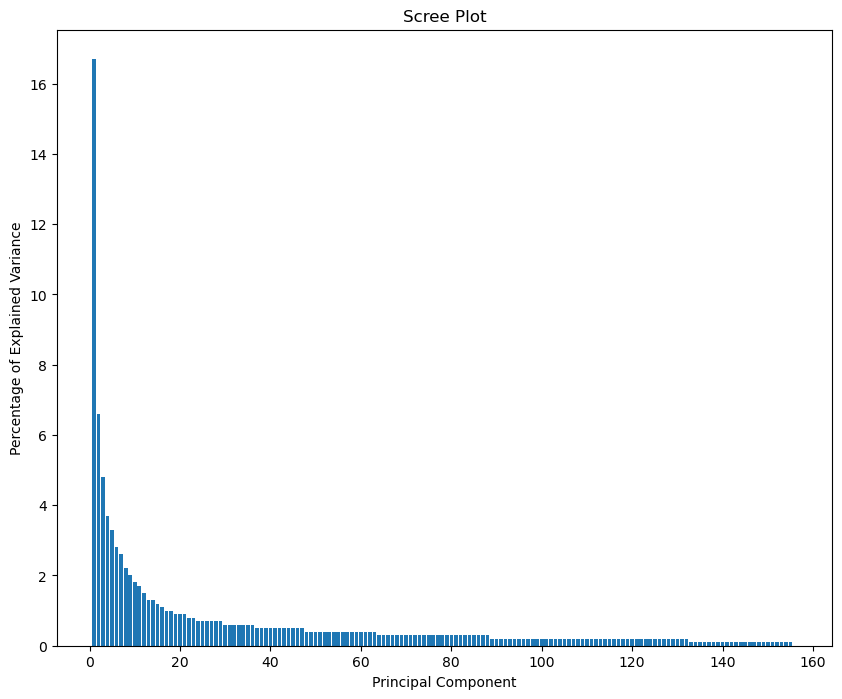

In [4]:

# expr.reset_index(drop = True, inplace = True)
# expr_numeric = expr_numeric.drop('ID', axis=0)
# print(expr_numeric)
scaled_data = preprocessing.scale(expr_numeric.T)
pca = PCA()

scaled_data = np.nan_to_num(scaled_data)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
labels = [x for x in range(1, len(per_var) + 1)]
plt.figure(figsize=(10,8))
plt.bar(labels, per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig("PCA's Scree Plot", dpi = 300)
plt.show()

<Figure size 640x480 with 0 Axes>

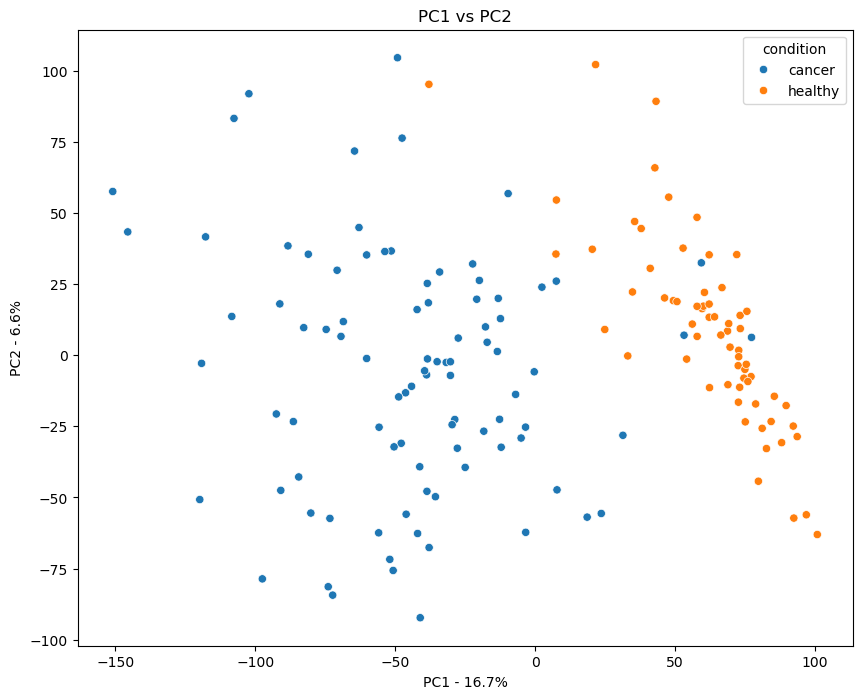

In [ ]:
pca_df = pd.DataFrame(pca_data, index = None, columns = labels)
pca_df = pca_df.join(metadata)
plt.figure(1)
plt.figure(figsize=(10,8))
sb.scatterplot(data = pca_df,
               x = 'PC1',
               y = 'PC2',
               hue = "condition")
plt.title("PC1 vs PC2")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#plt.savefig("PC1 vs PC2", dpi = 300)
plt.show()

Text(0, 0.5, 'PC3 - 4.8%')

<Figure size 640x480 with 0 Axes>

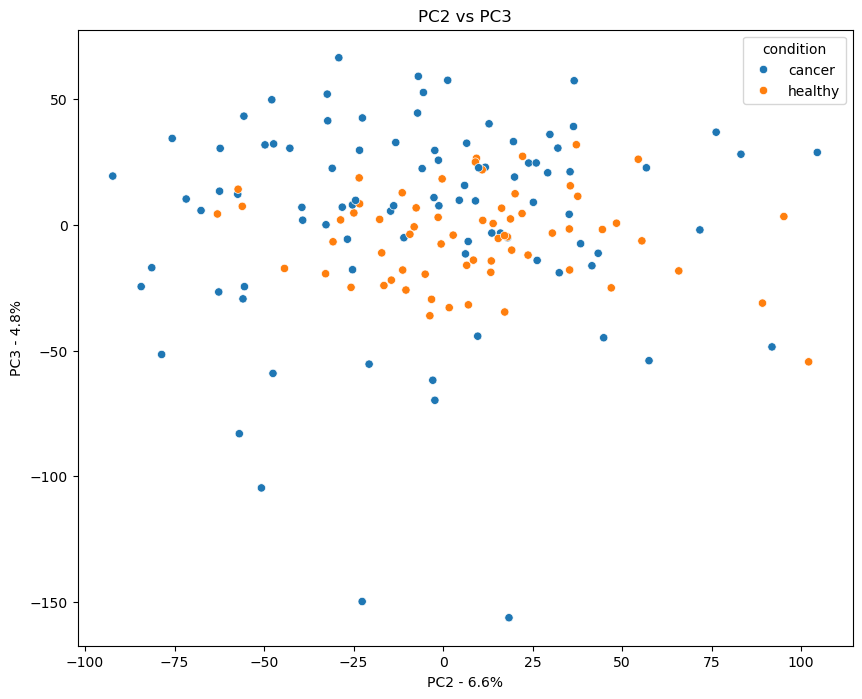

In [31]:
plt.figure(2)
plt.figure(figsize=(10,8))
sb.scatterplot(data = pca_df,
               x = 'PC2',
               y = 'PC3',
               hue = 'condition')
plt.title("PC2 vs PC3")
plt.xlabel("PC2 - {0}%".format(per_var[1]))
plt.ylabel("PC3 - {0}%".format(per_var[2]))

<Figure size 640x480 with 0 Axes>

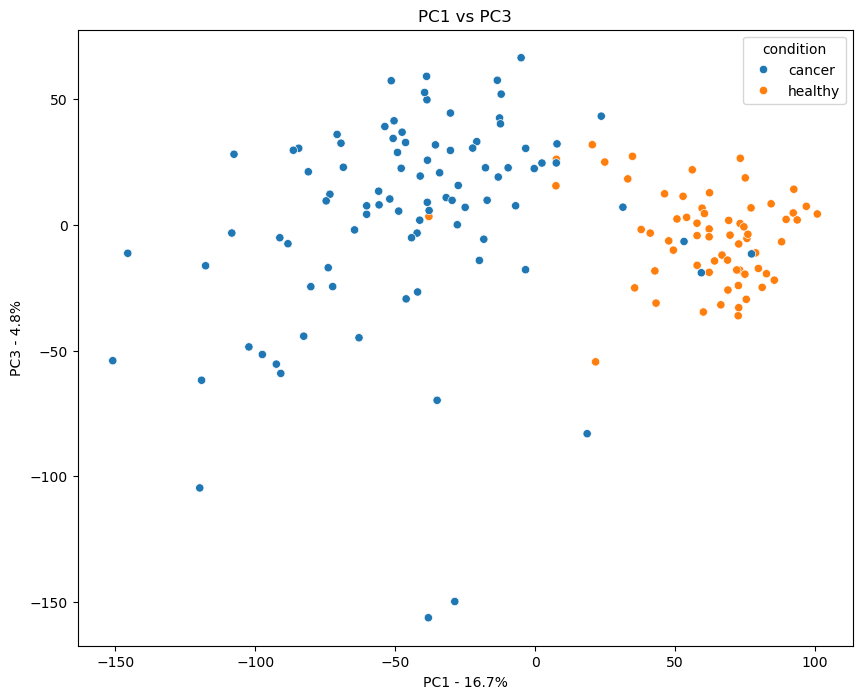

In [ ]:
plt.figure(3)
plt.figure(figsize=(10,8))
sb.scatterplot(data = pca_df,
               x = "PC1",
               y = "PC3", 
               hue = "condition")
plt.title("PC1 vs PC3")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC3 - {0}%".format(per_var[2]))
#plt.savefig("PC1 vs PC3", dpi = 300)
plt.show()

<Figure size 640x480 with 0 Axes>

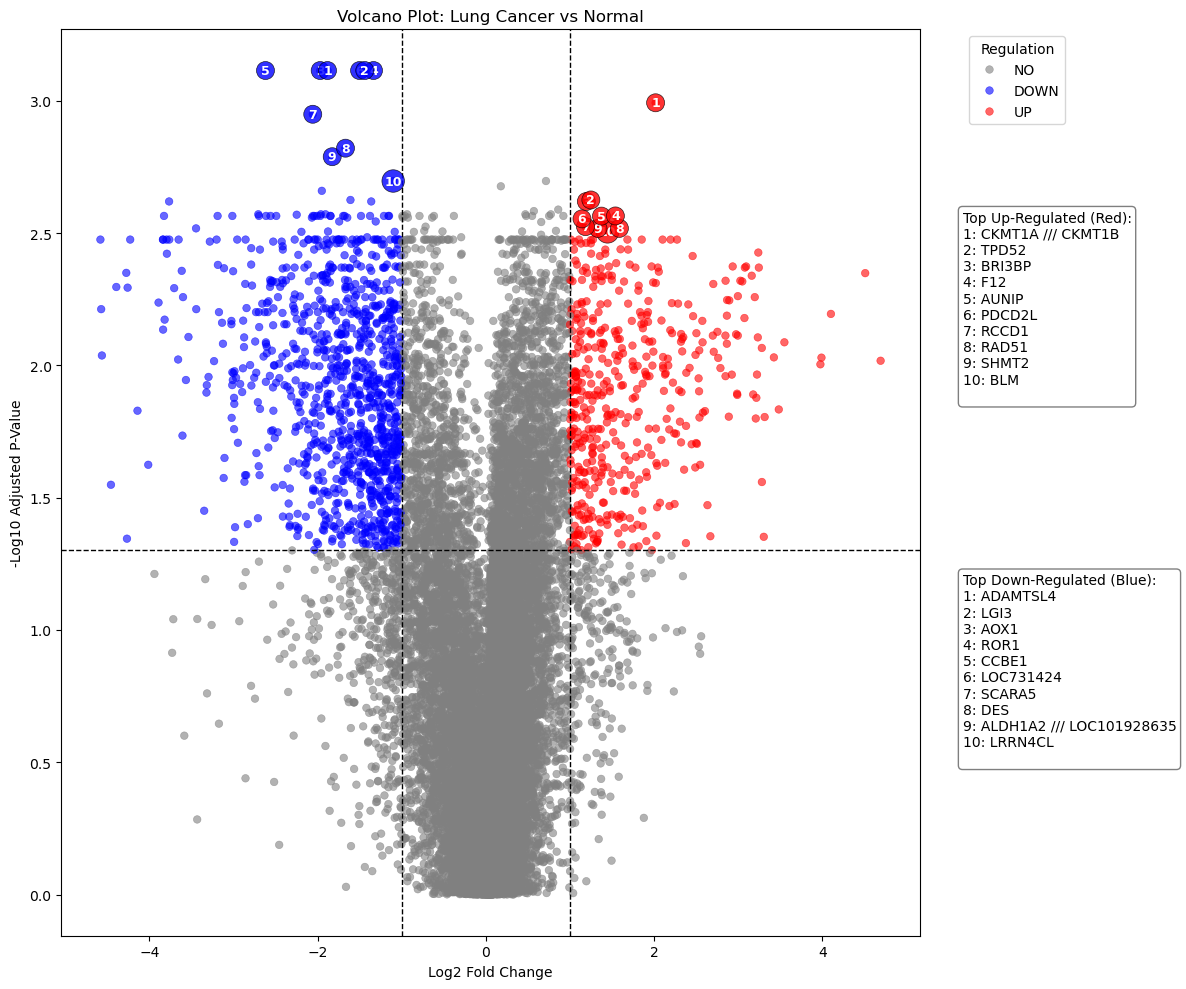

In [8]:

fc_threshold = 1
p_threshold = 0.05

conditions = [
    (expr_stats['log2fc'] > fc_threshold ) & (expr_stats['adj_p_value'] < p_threshold),
    (expr_stats['log2fc'] < -fc_threshold ) & (expr_stats['adj_p_value'] < p_threshold)
]

choices = ["UP", "DOWN"]
expr_stats['expression'] = np.select(conditions, choices, default = "NO")
plt.figure(4)
plt.figure(figsize=(12,10))
colors = {'UP': 'red', 'DOWN': 'blue', 'NO': 'grey'}
sb.scatterplot(data = expr_stats,
               x = 'log2fc',
               y = '-log10(padj)',
               hue = 'expression',
               palette= colors,
               alpha = 0.6,
               edgecolor = None,
               s = 30)
plt.axvline(x = fc_threshold, color = 'black', linestyle ='--', linewidth = 1)
plt.axvline(x = -fc_threshold, color = 'black', linestyle = '--', linewidth = 1)
plt.axhline(y =-np.log10(p_threshold), color='black', linestyle='--', linewidth=1)


texts = [] 
#print(expr_stats['expression'])
sig_genes_df = expr_stats[(expr_stats['expression'] == 'UP') | (expr_stats['expression'] == 'DOWN')]
#print(sig_genes_df['expression'])
sig_genes_df = sig_genes_df.sort_values(by='adj_p_value', ascending=True)

num_genes = 10
up_genes = sig_genes_df[(sig_genes_df['expression'] == 'UP')].head(num_genes)
down_genes = sig_genes_df[(sig_genes_df['expression'] == 'DOWN')].head(num_genes)

up_legend = "Top Up-Regulated (Red):\n"
down_legend = "Top Down-Regulated (Blue):\n"

for i, (idx, row) in enumerate(up_genes.iterrows(),1):
    plt.text(x=row['log2fc'], y=row['-log10(padj)'], s=str(i),
             fontsize=9, fontweight='bold', color='white', ha='center', va='center',zorder=20-i, 
             bbox=dict(boxstyle='circle,pad=0.2', fc='red', alpha=0.8, ec='black', lw=0.5))
    up_legend += f"{i}: {row['gene_symbol']}\n"
    
for i, (idx, row) in enumerate(down_genes.iterrows(),1):
     plt.text(x=row['log2fc'], y=row['-log10(padj)'], s=str(i),
             fontsize=9, fontweight='bold', color='white', ha='center', va='center',zorder=20-i, 
             bbox=dict(boxstyle='circle,pad=0.2', fc='blue', alpha=0.8, ec='black', lw=0.5))
     down_legend += f"{i}: {row['gene_symbol']}\n"

plt.text(1.05, 0.8, up_legend, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)) 

plt.text(1.05, 0.4, down_legend, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)) 

plt.title('Volcano Plot: Lung Cancer vs Normal')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.legend(title='Regulation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
#plt.savefig("Volcano Plot", dpi = 300)
plt.show()

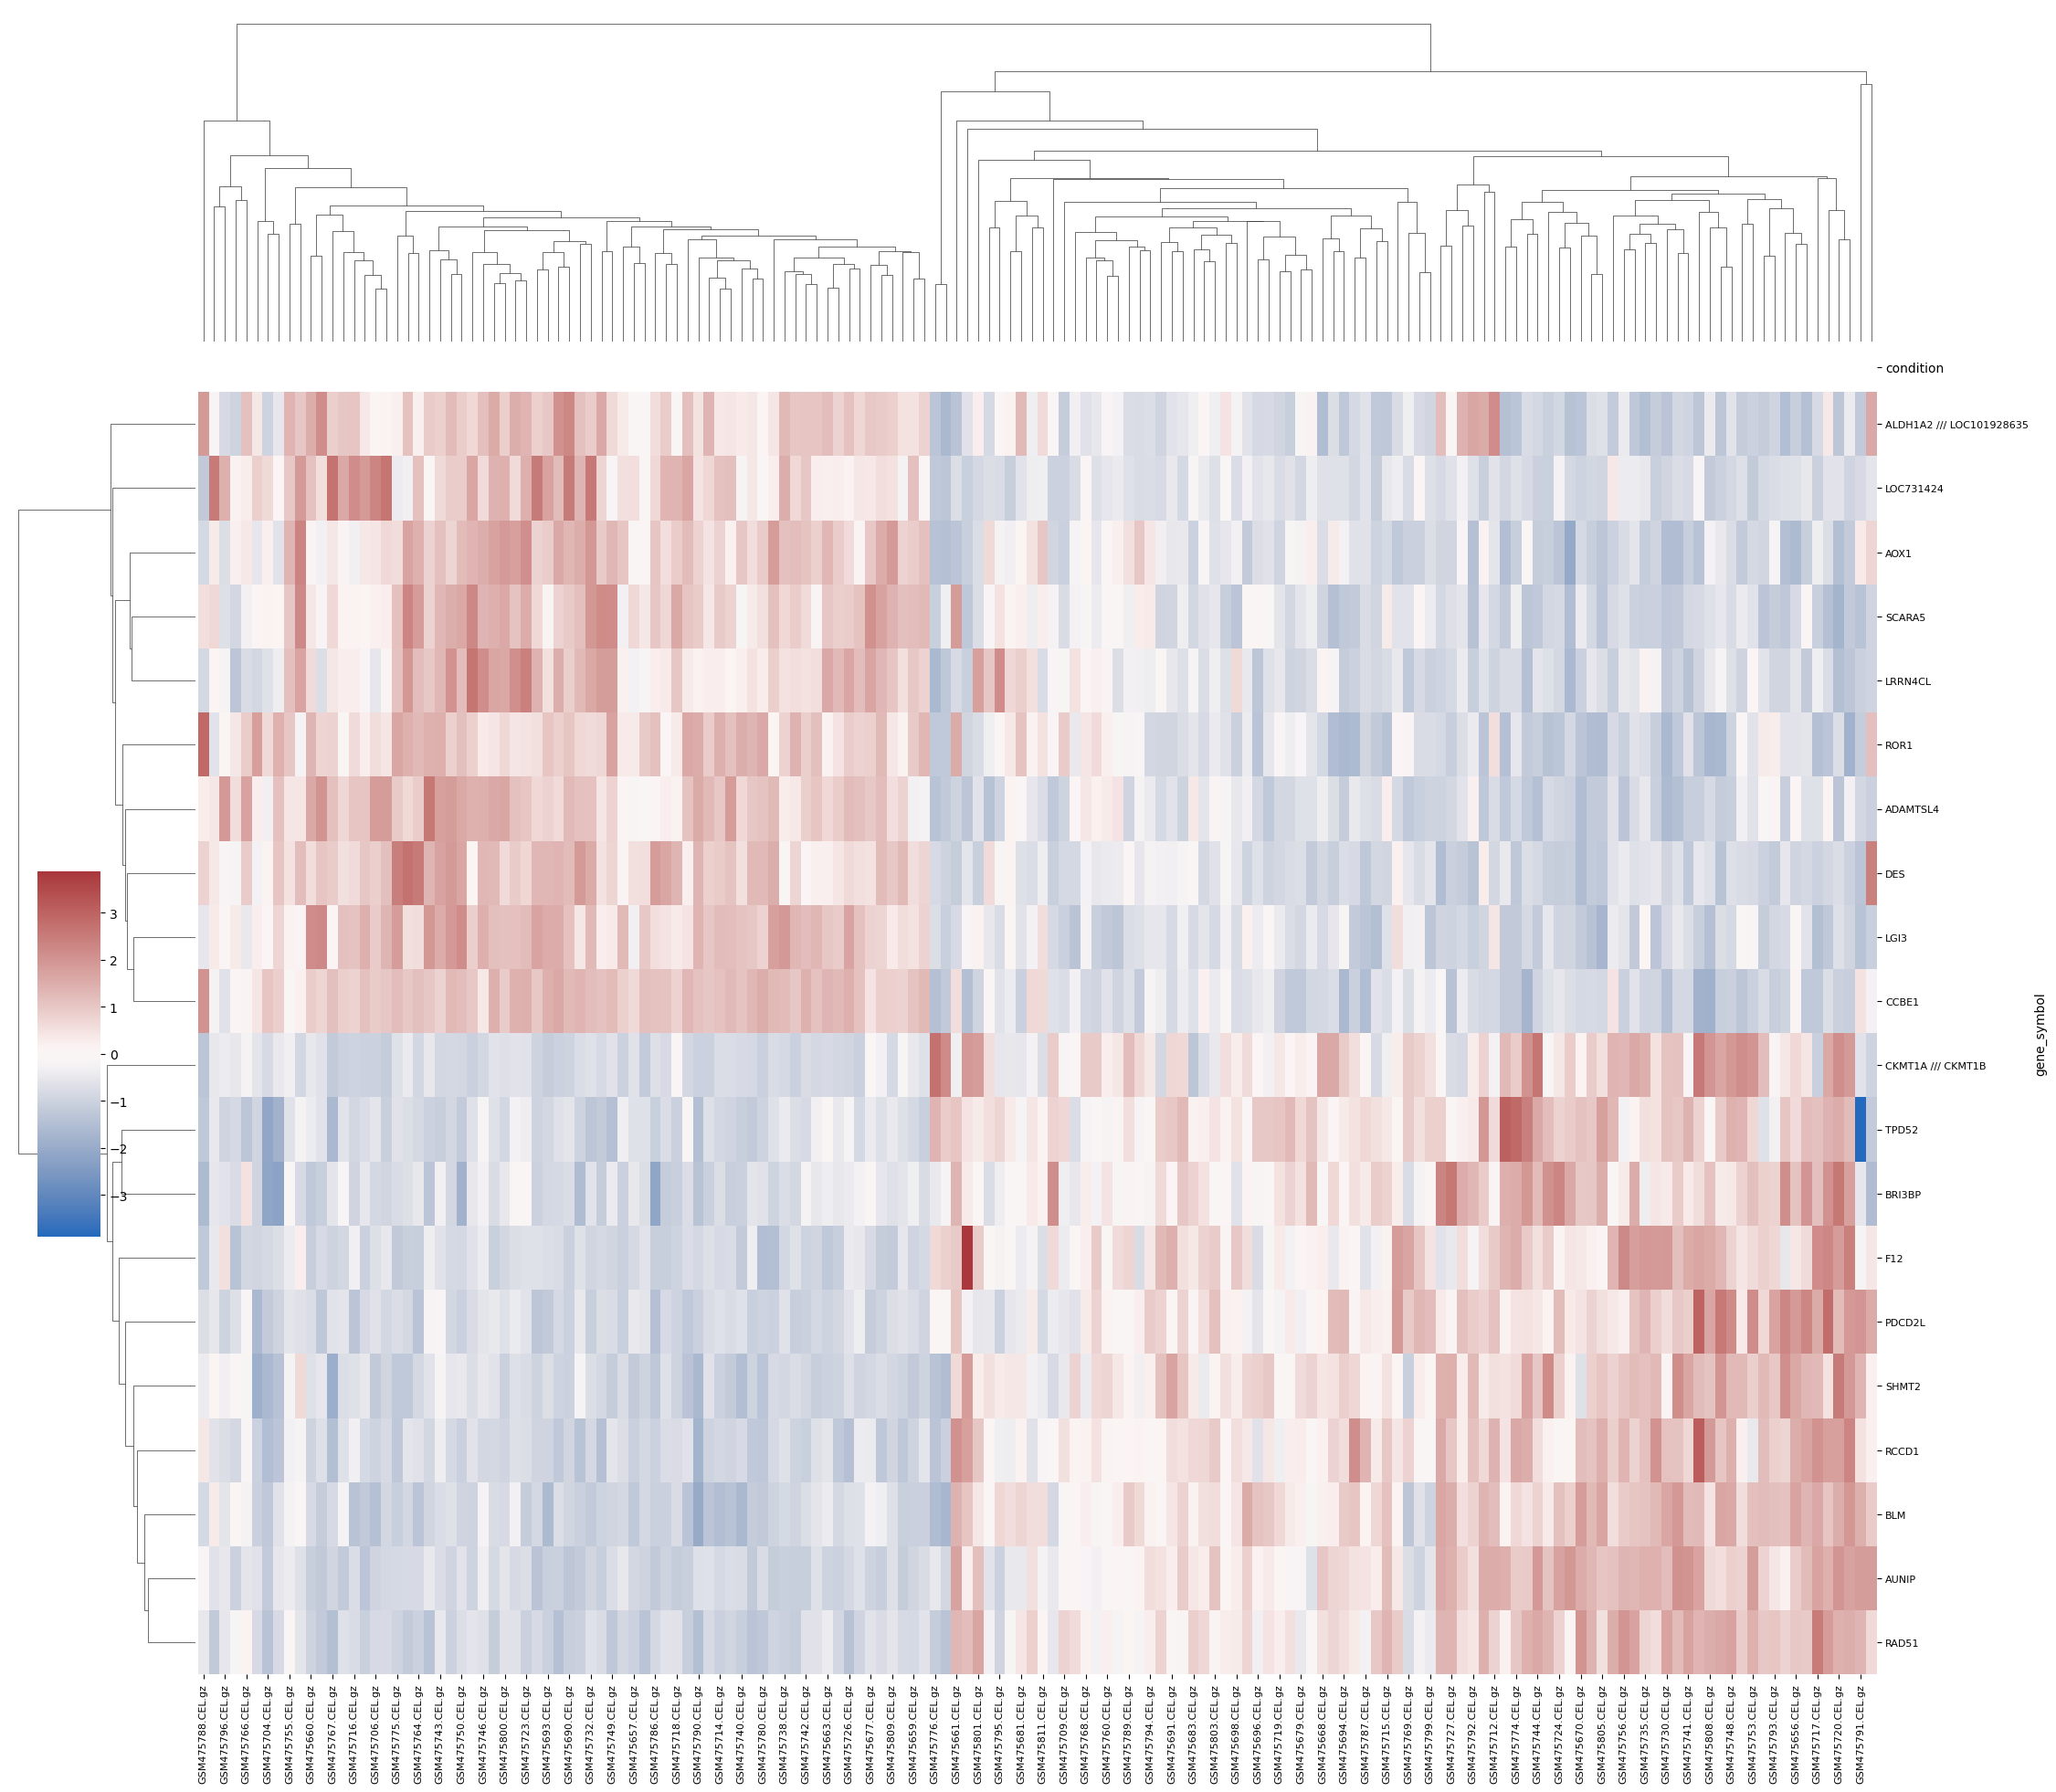

In [9]:
#print(sig_genes_df)

heatmap_data = pd.concat([up_genes, down_genes]).set_index('gene_symbol')
conditions_colors = metadata.condition.map({
    'normal':'red',
    'cancer':'blue'
})

g = sb.clustermap(data = heatmap_data.filter(like='GSM'),
                  z_score=0, 
                  cmap = 'vlag',
                  col_colors=conditions_colors,
                  figsize= (23,20),
                  dendrogram_ratio=(.1,.2),
                  cbar_pos=(.02,.32,.03,.2))
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=8)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)
#plt.savefig("heatmap", dpi = 300)
plt.show()

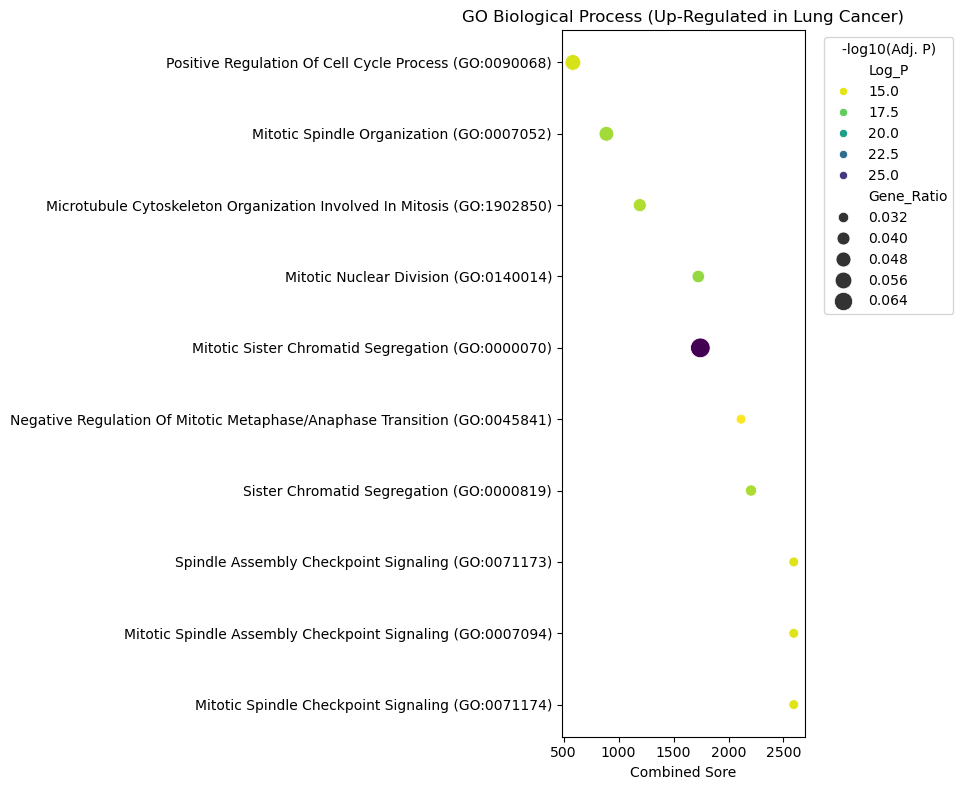

In [10]:
import gseapy as gp
from gseapy.plot import dotplot
#print(expr_stats['expression'])
up_genes = expr_stats[(expr_stats['expression'] == "UP")].gene_symbol.tolist()
enr_go_up = gp.enrichr(gene_list= up_genes,
                       gene_sets= 'GO_Biological_Process_2023',
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_go_up.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = df['Count']/len(up_genes)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df = df.sort_values('Adjusted P-value', ascending=True).head(10)
plt.figure(figsize=(10,8))
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = True).head(10)
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("GO Biological Process (Up-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("go_process(up)", dpi = 300)
plt.show()


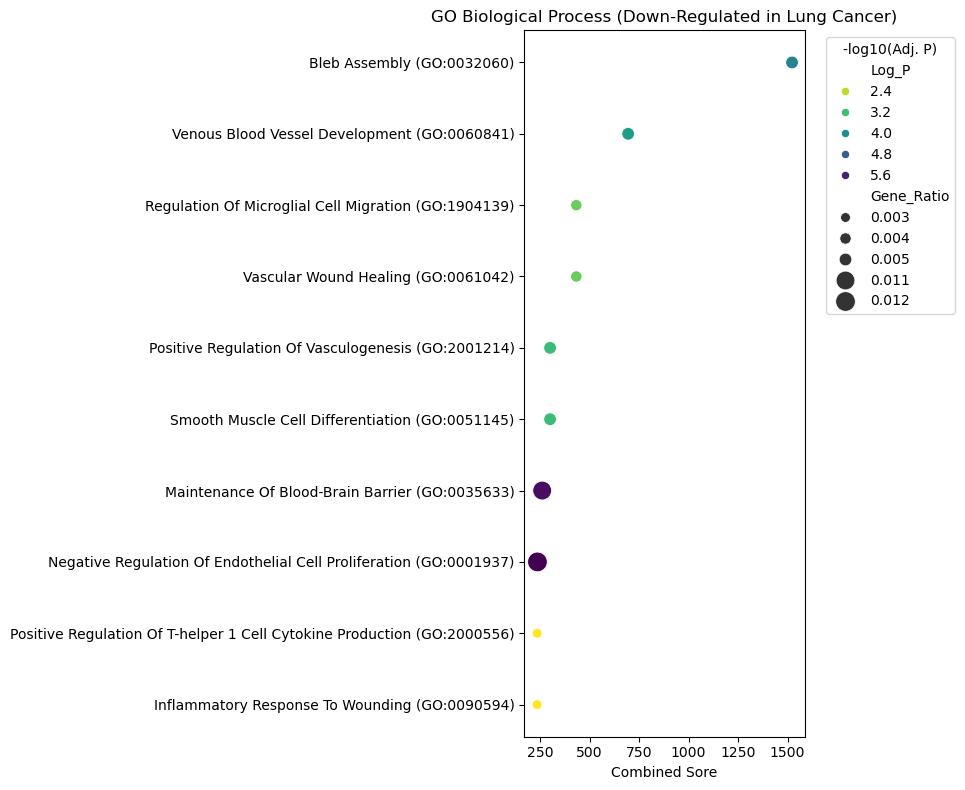

In [11]:
down_genes = expr_stats[(expr_stats['expression'] == "DOWN")].gene_symbol.tolist()
enr_go_down = gp.enrichr(gene_list = down_genes,
                         gene_sets = "GO_Biological_Process_2023",
                         organism = "human",
                         background = expr["Gene Symbol"].tolist(),
                         outdir= None)
df = enr_go_down.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(down_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("GO Biological Process (Down-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("go_process(down)", dpi = 300)
plt.show()

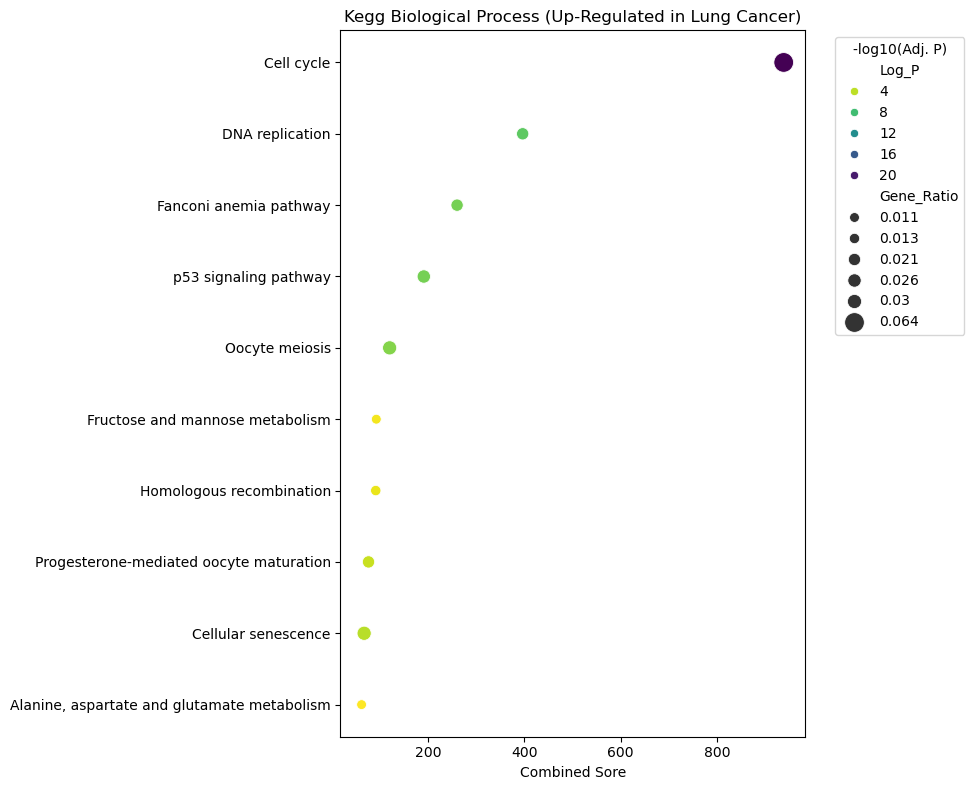

In [12]:
enr_kegg_up = gp.enrichr(gene_list= up_genes,
                       gene_sets= 'KEGG_2021_Human',
                       organism= "human",
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_kegg_up.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(up_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Kegg Biological Process (Up-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("kegg_process(up)", dpi = 300)
plt.show()

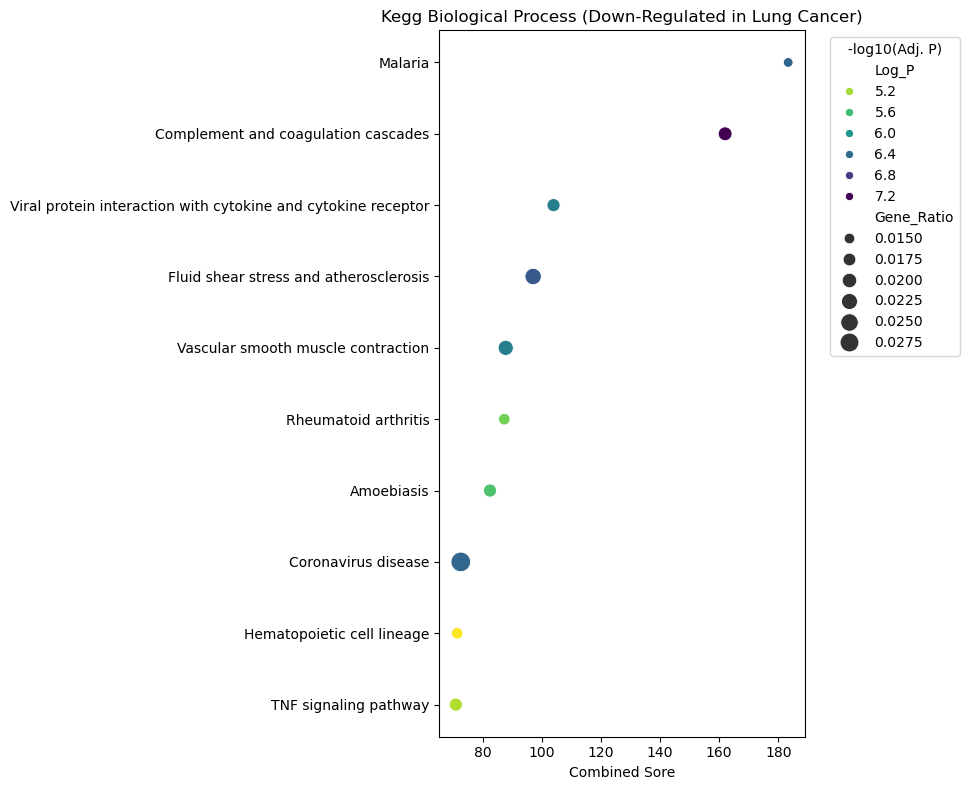

In [13]:
enr_kegg_down = gp.enrichr(gene_list= down_genes,
                       gene_sets= 'KEGG_2021_Human',
                       organism= "human",
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_kegg_down.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(down_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Kegg Biological Process (Down-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("kegg_process(down)", dpi = 300)
plt.show()

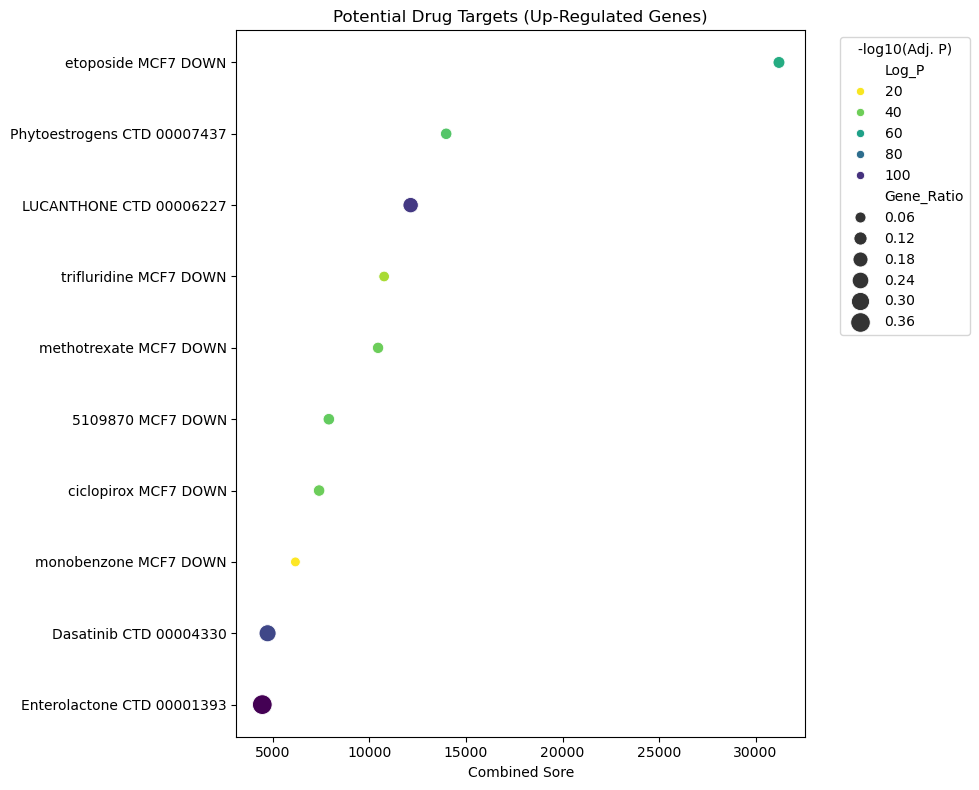

In [14]:
enr_drug = gp.enrichr(gene_list = up_genes,
                    gene_sets = 'DSigDB',
                    organism = "human",
                    background = expr["Gene Symbol"].tolist(),
                    outdir = None)
df = enr_drug.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(up_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Potential Drug Targets (Up-Regulated Genes)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("drug_targets", dpi = 300)
plt.show()


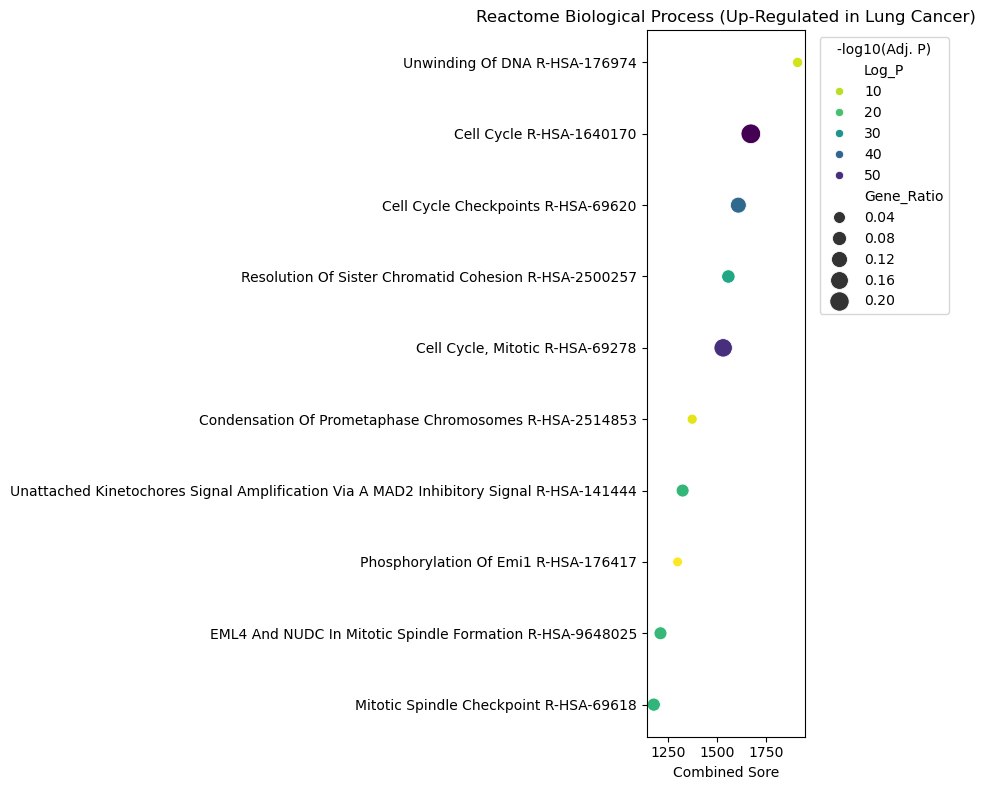

In [15]:
enr_reactome_up = gp.enrichr(gene_list= up_genes,
                       gene_sets= 'Reactome_2022',
                       organism= "human",
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_reactome_up.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(up_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Reactome Biological Process (Up-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("reactome_process(up)", dpi = 300)
plt.show()

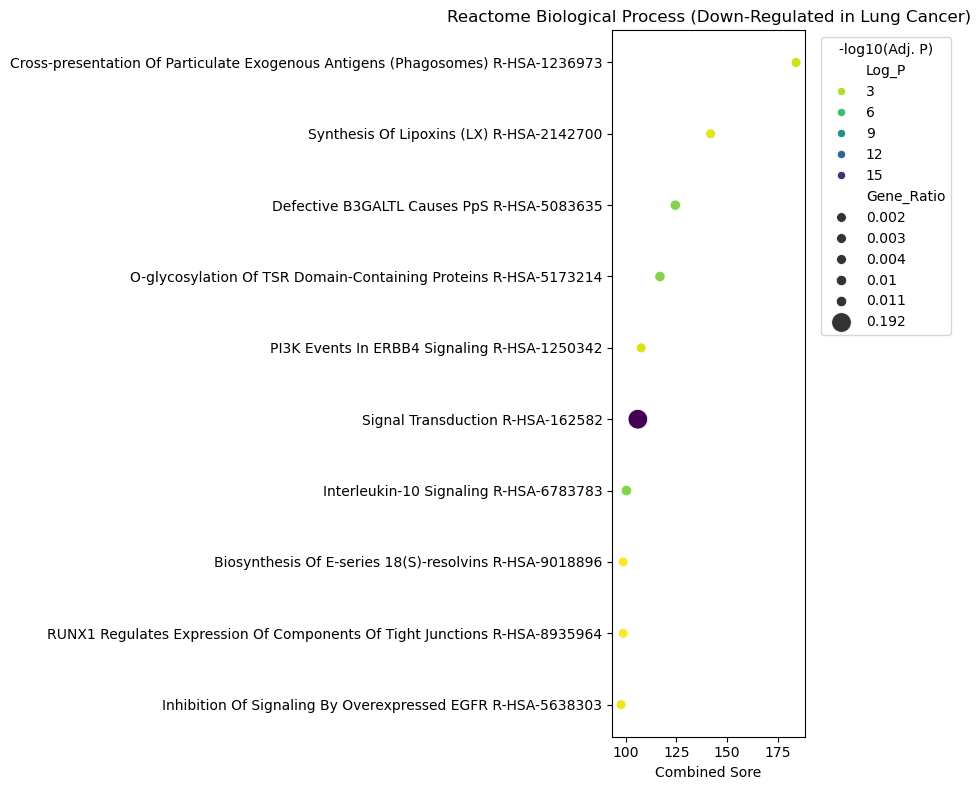

In [16]:
enr_reactome_down = gp.enrichr(gene_list= down_genes,
                       gene_sets= 'Reactome_2022',
                       organism= "human",
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_reactome_down.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(down_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Reactome Biological Process (Down-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("reactome_process(down)", dpi = 300)
plt.show()

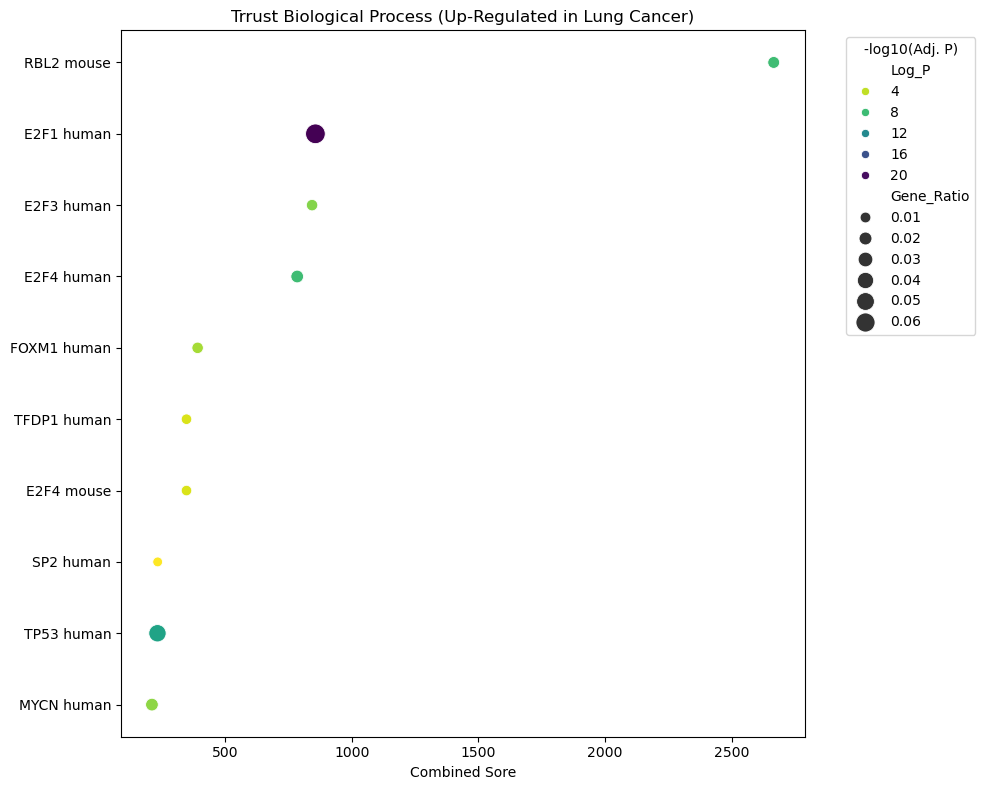

In [17]:
enr_trrust_up = gp.enrichr(gene_list= up_genes,
                       gene_sets= 'TRRUST_Transcription_Factors_2019',
                       organism= "human",
                       background= expr["Gene Symbol"].tolist(),
                       outdir=None)
df = enr_trrust_up.res2d.copy()
cols = ['P-value', 'Adjusted P-value', 'Odds Ratio', 'Combined Score']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df['Count'] = df['Genes'].apply(lambda x: len(str(x).split(';')))
df['Gene_Ratio'] = round(df['Count']/len(up_genes),3)
df = df.dropna(subset=['Adjusted P-value', 'Gene_Ratio'])
df['Log_P'] = -np.log10(df['Adjusted P-value'] + 1e-200)
df['Combined Score'] = pd.to_numeric(df['Combined Score'], errors='coerce')
df = df.sort_values('Combined Score', ascending = False).head(10)

plt.figure(figsize=(10,8))
sb.scatterplot(data=df,
               x="Combined Score",
               y="Term",
               size="Gene_Ratio",
               hue="Log_P",
               palette="viridis_r",
               sizes=(50,200))
plt.title("Trrust Biological Process (Up-Regulated in Lung Cancer)")
plt.xlabel("Combined Sore")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="-log10(Adj. P)") 
plt.tight_layout()
#plt.savefig("trrust_process(up)", dpi = 300)
plt.show()

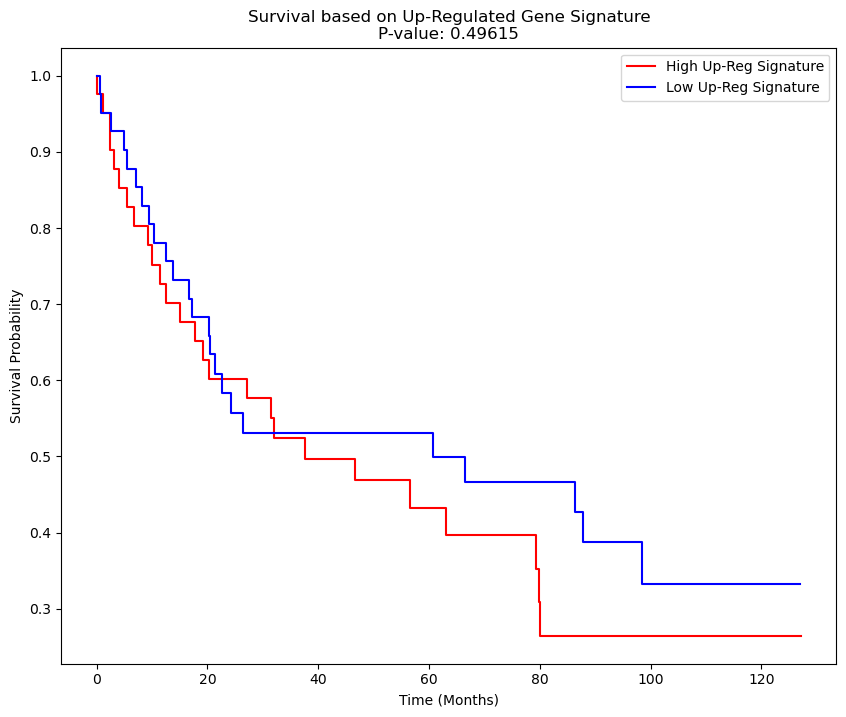

In [18]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

expr.columns = expr.columns.str.replace('.CEL.gz', '', regex = False)
expr_index = expr.set_index('Gene Symbol')
expr_flip = expr_index.T
expr_flip = expr_flip.reset_index()
expr_flip = expr_flip.rename(columns={'index':'geo_accession'})
#expr_flip["mean_val"] = None
#print(expr_flip)
#print(metadata)
df = pd.merge(metadata, expr_flip, on="geo_accession")
df['events'] = df['survival_status'].apply(lambda x:1 if str(x).lower() == 'deceased' else 0)
df['survival'] = pd.to_numeric(df['survival'], errors="coerce")
df = df.dropna(subset=['survival'])
df['up_score'] = df[up_genes].mean(axis=1)
threshold = df['up_score'].median()
high_risk = df[df["up_score"] > threshold]
low_risk = df[df["up_score"] <= threshold]

#print(df)
kmf = KaplanMeierFitter()
plt.figure(figsize=(10,8))
kmf.fit(durations=high_risk['survival'], event_observed=high_risk['events'], label='High Up-Reg Signature')
kmf.plot_survival_function(color='red', ci_show = False)
kmf.fit(durations=low_risk['survival'], event_observed=low_risk['events'], label="Low Up-Reg Signature")
kmf.plot_survival_function(color='blue', ci_show = False)

res = logrank_test(
    high_risk['survival'], low_risk['survival'],
    event_observed_A=high_risk['events'],event_observed_B=low_risk['events']    
)
plt.title(f"Survival based on Up-Regulated Gene Signature\nP-value: {res.p_value:.5f}")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_20612\1873327362.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(data = top_hits,


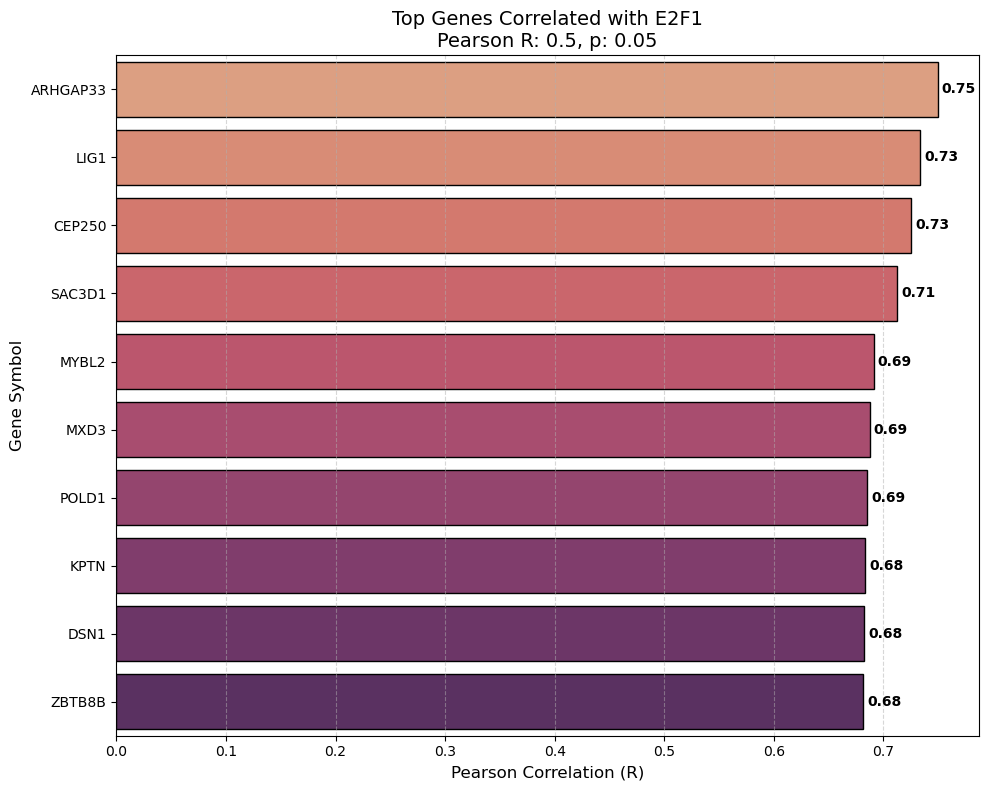

In [31]:
anchor_gene = 'E2F1'
corrs = []
gene_cols = [c for c in df.columns if c not in ['Patient_ID', 'survival', 'survival_status', 'event_status', 'events']][5:-3]
for gene in gene_cols:
    if (gene == anchor_gene): continue
    corr, p = pearsonr(df[anchor_gene], df[gene])
    if (p < 0.05 and abs(corr) > 0.5):
        corrs.append({'Gene':gene, 'R':corr, 'P_val':p})
corr_df = pd.DataFrame(corrs)
top_hits = corr_df.sort_values(by='R', ascending=False).head(10)
# print(f"--- Top Genes Correlated with {anchor_gene} ---")
# print(top_hits)
plt.figure(figsize=(10,8))
ax = sb.barplot(data = top_hits,
                x = 'R',
                y = 'Gene',
                palette = 'flare',
                edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container,
                 fmt = '%.2f',
                 padding = 3, 
                 fontsize = 10,
                 fontweight = 'bold')
plt.title(f"Top Genes Correlated with {anchor_gene}\nPearson R: 0.5, p: 0.05", fontsize=14)
plt.xlabel("Pearson Correlation (R)", fontsize=12)
plt.ylabel("Gene Symbol", fontsize=12)
plt.grid(axis='x',  linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("E2F1_correlations_pearsonr.png", dpi = 300)
plt.show()

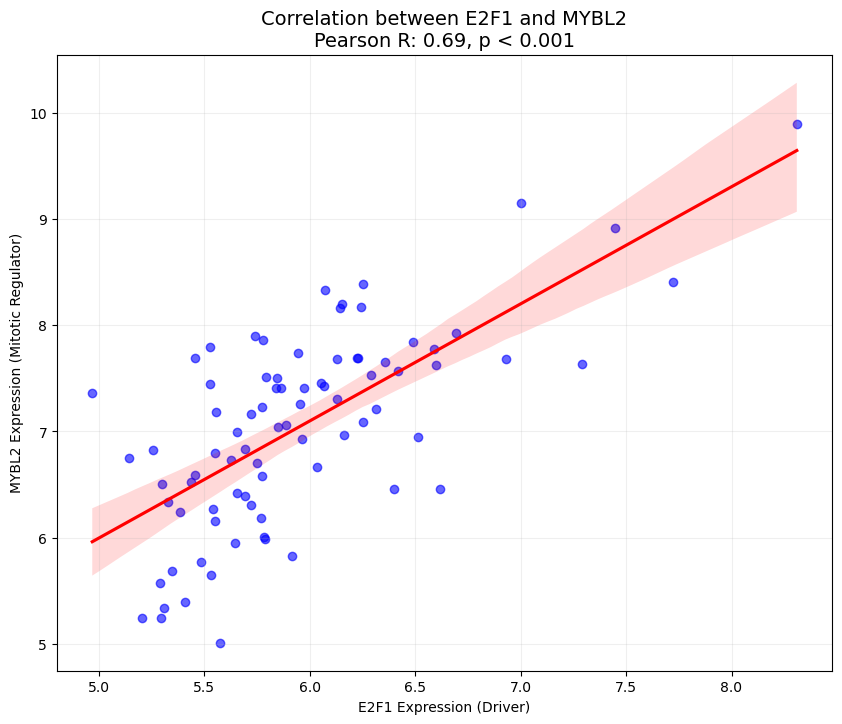

In [ ]:
gene_x = 'E2F1'
gene_y = 'MYBL2'

if gene_x in df.columns and gene_y in df.columns:
    plt.figure(figsize=(10,8))
    sb.regplot(data = df,
               x = gene_x,
               y = gene_y,
               scatter_kws={'alpha':0.6, 'color':'blue'},
               line_kws={'color':'red'})
    corr, p_val = pearsonr(df[gene_x], df[gene_y])
    if p_val < 0.001:
        p_text = "p < 0.001"
    else:
        p_text = f"p = {p:.3f}"
    #print(p_val, corr)
    plt.title(f"Correlation between {gene_x} and {gene_y}\nPearson R: {corr:.2f}, {p_text}", fontsize=14)
    plt.xlabel("E2F1 Expression (Driver)")
    plt.ylabel("MYBL2 Expression (Mitotic Regulator)")
    plt.grid(alpha=0.2)
    #plt.savefig("e2f1_mybl2_pearsonr", dpi = 300)
    plt.show()

In [21]:
anchor_gene = 'CKMT1A /// CKMT1B'
corrs = []
#print(gene_cols)
for gene in gene_cols:
    if (gene == anchor_gene): continue
    corr, p = pearsonr(df[anchor_gene], df[gene])
    if (gene == 'E2F1'):
        print(corr,p) #E2F1 does not correlate with CKMT1A 
    if (p < 0.05 and abs(corr) > 0.5):
        corrs.append({'Gene':gene, 'R':corr, 'P_val':p})

-0.11171262080425182 0.3176965132167549


C:\Users\admin\AppData\Local\Temp\ipykernel_20612\2730257652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(data = top_hits,


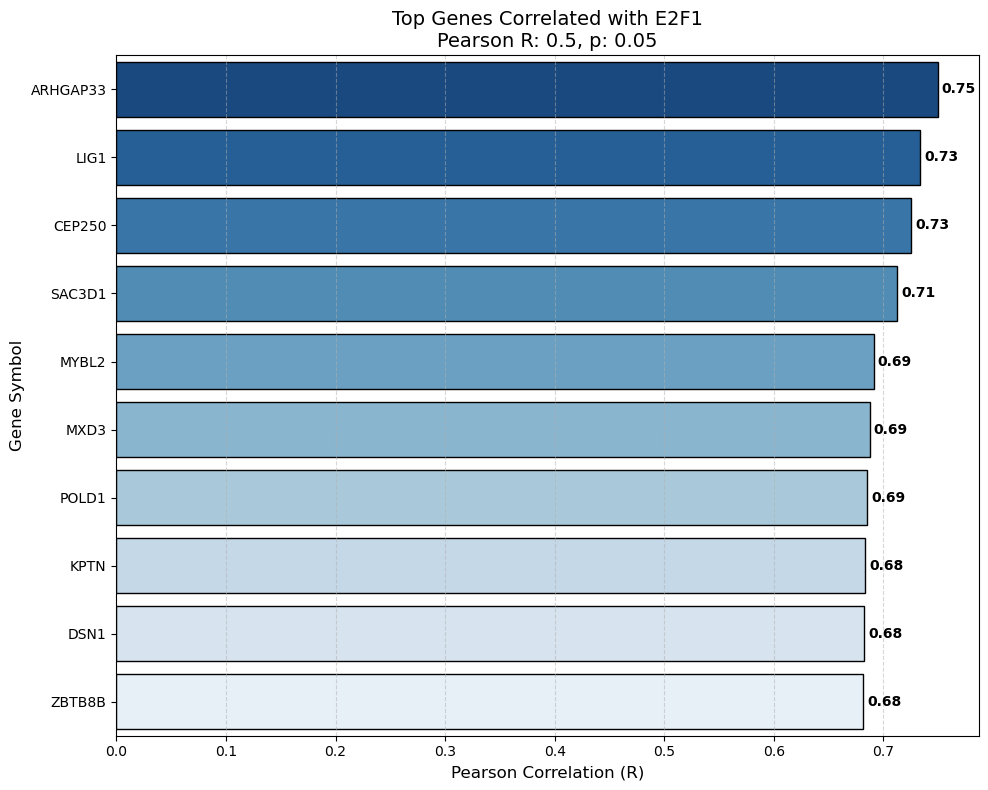

In [32]:
corr_df = pd.DataFrame(corrs)
# top_hits = corr_df.sort_values(by='R', ascending=False).head(10)
# print(f"--- Top Genes Correlated with {anchor_gene} ---")
# print(top_hits)
plt.figure(figsize=(10,8))
ax = sb.barplot(data = top_hits,
                x = 'R',
                y = 'Gene',
                palette = 'Blues_r',
                edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container,
                 fmt = '%.2f',
                 padding = 3, 
                 fontsize = 10,
                 fontweight = 'bold')
plt.title(f"Top Genes Correlated with {anchor_gene}\nPearson R: 0.5, p: 0.05", fontsize=14)
plt.xlabel("Pearson Correlation (R)", fontsize=12)
plt.ylabel("Gene Symbol", fontsize=12)
plt.grid(axis='x',  linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("CKMT1A_correlations_pearsonr.png", dpi = 300)
plt.show()